In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("dataR2.csv")


## Citation
Patrcio,Miguel, Pereira,Jos, Crisstomo,Joana, Matafome,Paulo, Seia,Raquel, and Caramelo,Francisco. (2018). Breast Cancer Coimbra. UCI Machine Learning Repository. https://doi.org/10.24432/C52P59.

## Getting a general overview of the dataset



In [2]:
# Display the first few rows of the dataset
data.head()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


The dataset consists of the following columns:



*   Age: The age of the patient.

*   BMI: Body Mass Index of the patient.

*   Glucose: Glucose level.

*   Insulin: Insulin level.

*   HOMA: Homeostatic Model Assessment (a measure of insulin resistance).

*   Leptin: A hormone associated with body fat.

*   Adiponectin: A protein hormone involved in glucose regulation and fatty acid oxidation.

*   Resistin: A hormone related to obesity and insulin resistance.

*   MCP.1: Monocyte Chemoattractant Protein-1, a biomarker.

*   Classification

  *   1: Healthy controls (no breast cancer).
  *   2: Patients (with breast cancer).



## Descriptive Statistics, Checking for missing values.

In [3]:
# Display summary statistics, Check for missing values
data.describe(), data.isnull().sum()

(              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
 count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
 mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
 std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
 min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
 25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
 50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
 75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
 max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   
 
        Adiponectin    Resistin        MCP.1  Classification  
 count   116.000000  116.000000   116.000000      116.000000  
 mean     10.180874   14.725966   534.647000        1.551724  
 std       6.843341   12.390646   345.912663        0.499475  
 min    

### Summary of Findings
Missing Values: There are no missing values in the dataset.

### Descriptive Statistics:


*   The Age of patients ranges from 24 to 89 years, with a mean of approximately 57.30 years.

*   BMI ranges from about 18.37 to 38.58, with a mean of 27.58.

*   Glucose levels range from 60 to 201, with an average of about 97.79.

*   Insulin levels vary widely from 2.43 to 58.46, with an average of 10.01.

*   HOMA scores range from approximately 0.47 to 25.05, with an average of 2.69.

*   Leptin levels range from 4.31 to 90.28, with a mean of 26.62.

*   Adiponectin levels range from 1.66 to 38.04, with an average of 10.18.

*   Resistin levels vary from 3.21 to 82.10, with a mean of 14.73.

*   MCP.1 levels range from 45.84 to 1698.44, with an average of 534.65.

*   The Classification target variable is binary, where 1 and 2 represent the absence and presence of breast cancer, respectively.







## Distribution Analysis:
We will analyze the distribution of each feature to understand their spread and skewness.



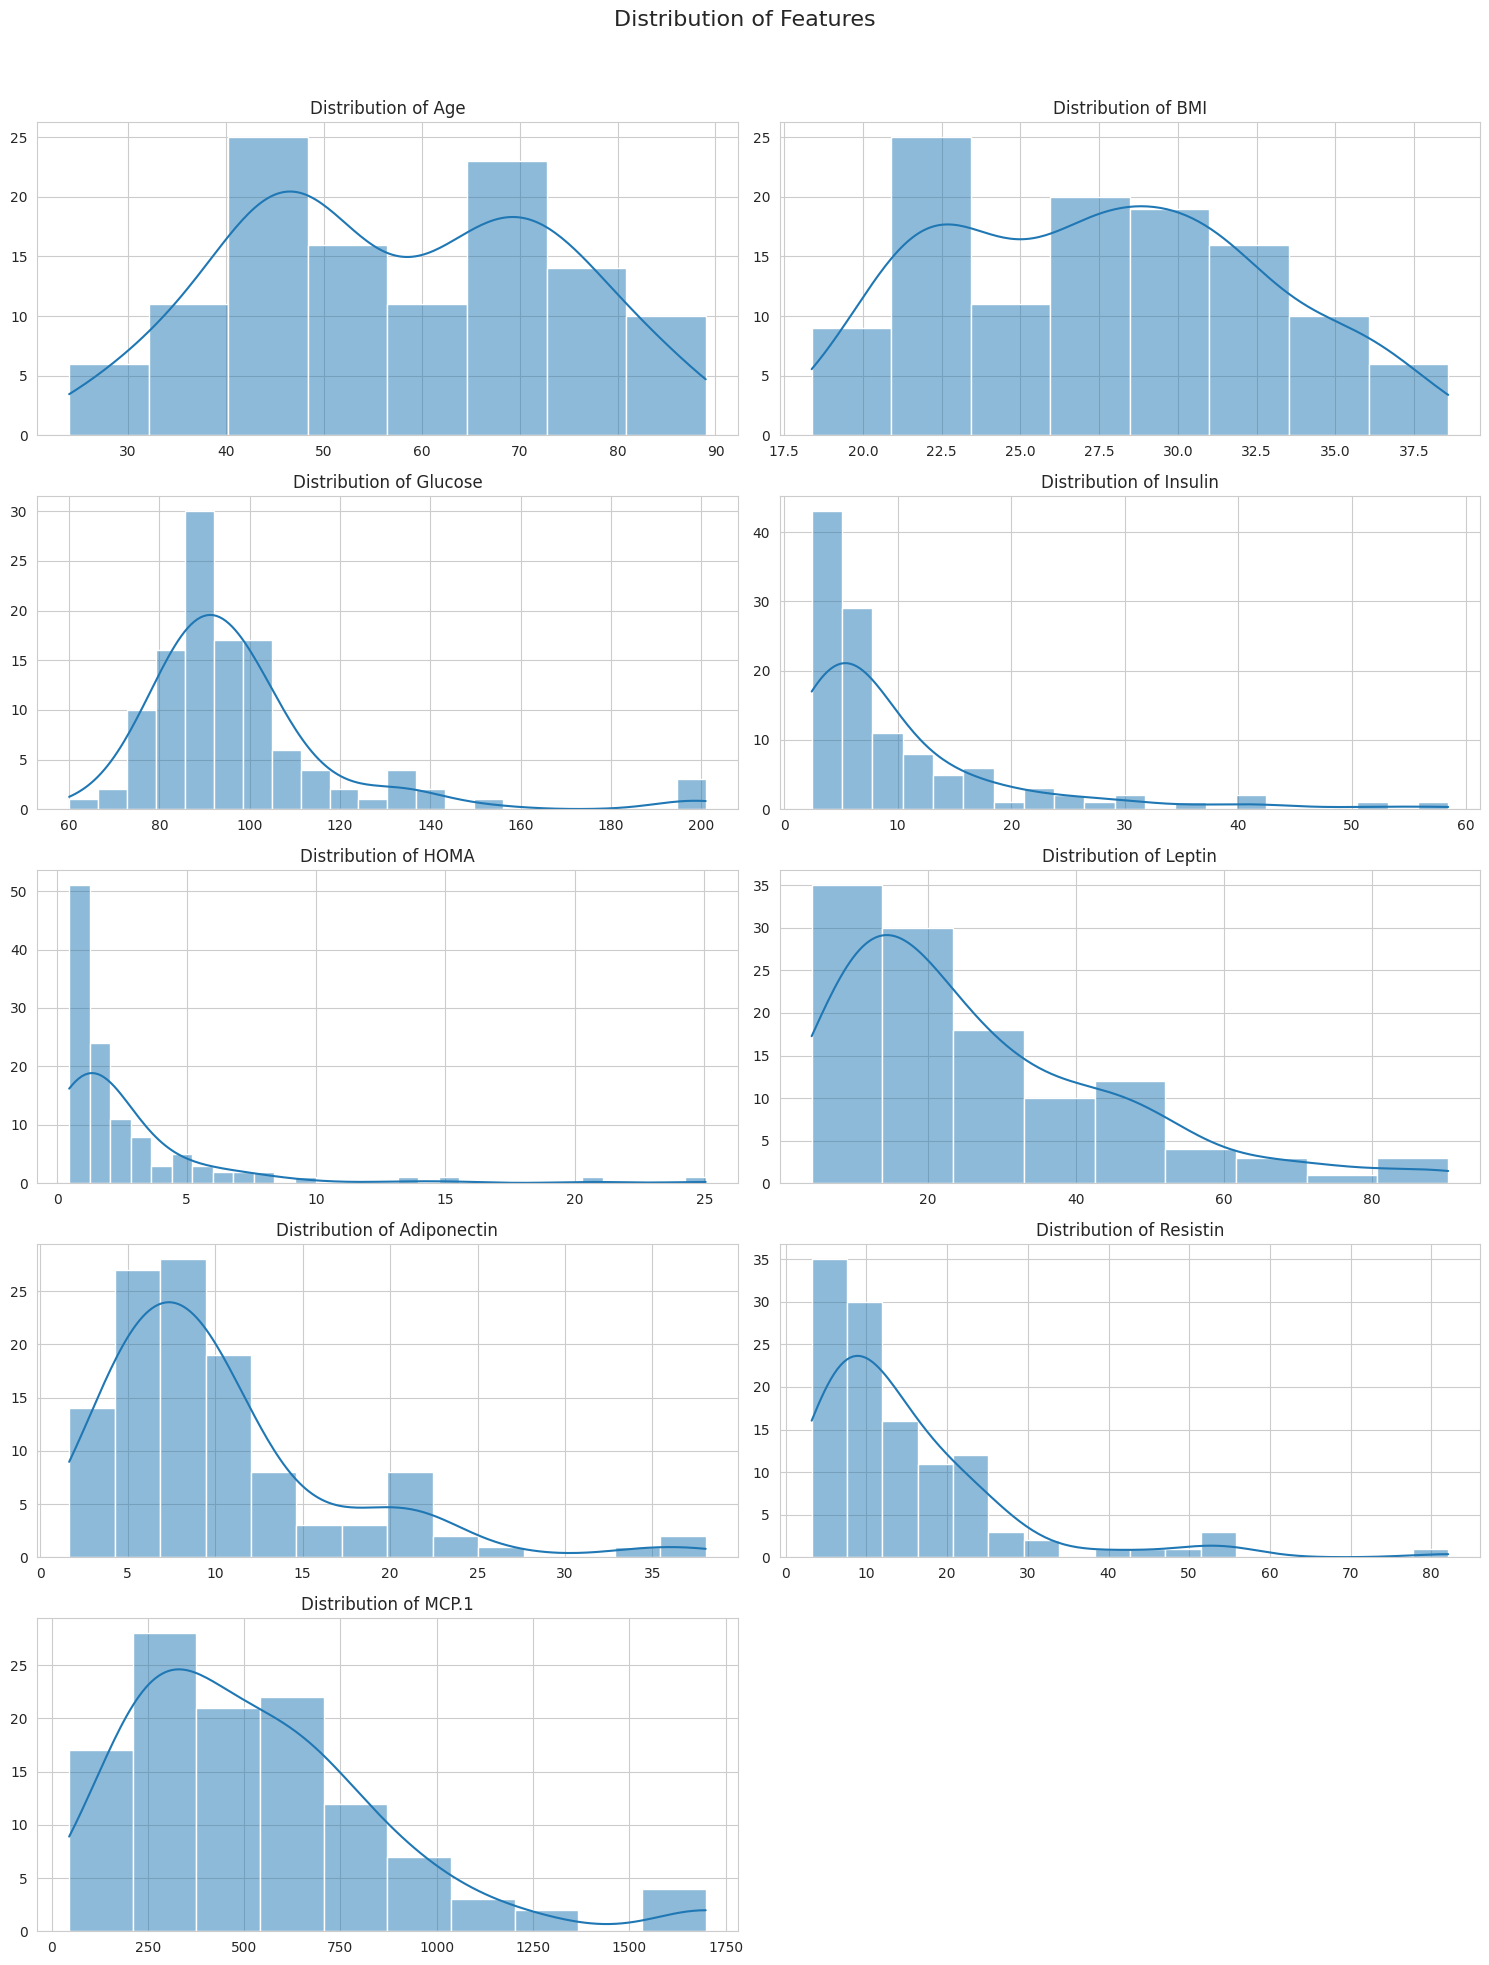

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of each feature
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Features', fontsize=16)

columns = data.columns[:-1]  # Excluding the target variable 'Classification'
for i, col in enumerate(columns):
    sns.histplot(data[col], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {col}')
    axes[i // 2, i % 2].set_xlabel('')
    axes[i // 2, i % 2].set_ylabel('')

# Remove any empty subplots
for j in range(len(columns), 10):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Correlation Analysis:
We will look at the correlation between features to identify potential multicollinearity and understand the relationship with the target variable.


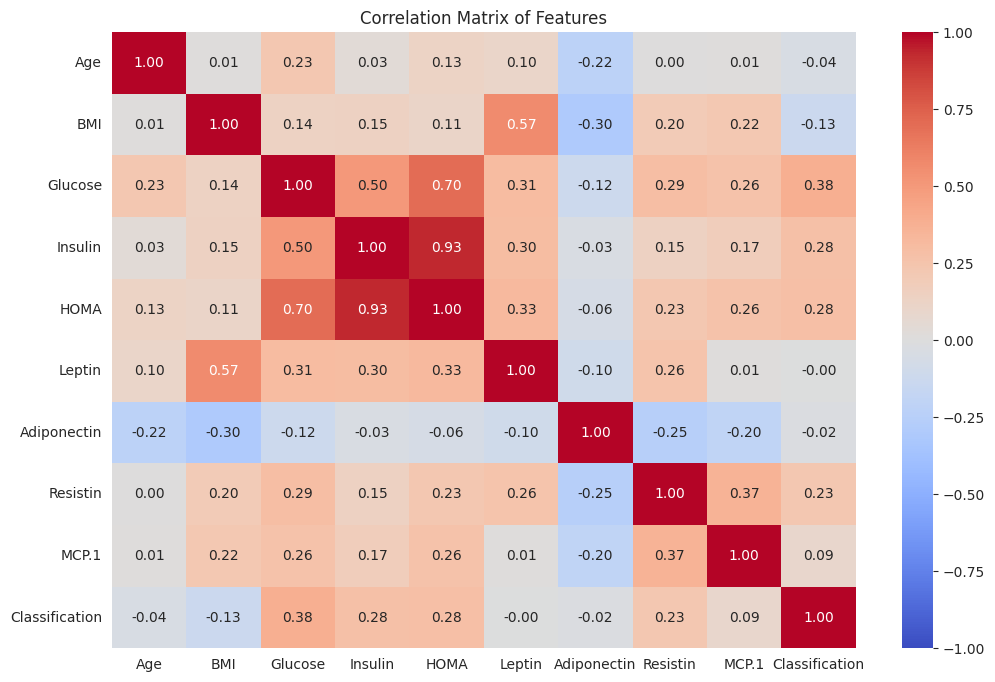

Classification    1.000000
Glucose           0.384315
HOMA              0.284012
Insulin           0.276804
Resistin          0.227310
MCP.1             0.091381
Leptin           -0.001078
Adiponectin      -0.019490
Age              -0.043555
BMI              -0.132586
Name: Classification, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Extract correlation with the target variable 'Classification'
target_corr = correlation_matrix['Classification'].sort_values(ascending=False)
print(target_corr)


### Key Observations:
**Classification Correlations:**

*   Glucose: Shows a moderate positive correlation with Classification (0.38), indicating that higher glucose levels may be associated with being classified as a patient (as opposed to a healthy control).

*   Insulin: Shows a moderate positive correlation with Classification (0.28), similar to glucose.

*   HOMA: Also shows a moderate positive correlation with Classification (0.28), likely due to its relationship with insulin and glucose.

*   BMI: Shows a slight negative correlation with Classification (-0.13), suggesting a minor inverse relationship.

*   Other features like Age, Leptin, Adiponectin, Resistin, and MCP.1 show weak correlations with Classification.


**Feature Correlations:**

*   Insulin and HOMA: These two features have a very high positive correlation (0.93), indicating strong multicollinearity. This makes sense as HOMA is derived from insulin levels.

*   Glucose and HOMA: These features also show a strong positive correlation (0.70), which is expected since HOMA involves glucose.

*   Leptin and BMI: Show a moderate positive correlation (0.57), indicating that higher BMI is associated with higher leptin levels.

*   Other Notable Correlations:

  *   Insulin and Glucose: Moderate positive correlation (0.50).
  *   Resistin and MCP.1: Moderate positive correlation (0.37).




## Visualize Data:
Use visualizations to depict relationships and distributions.

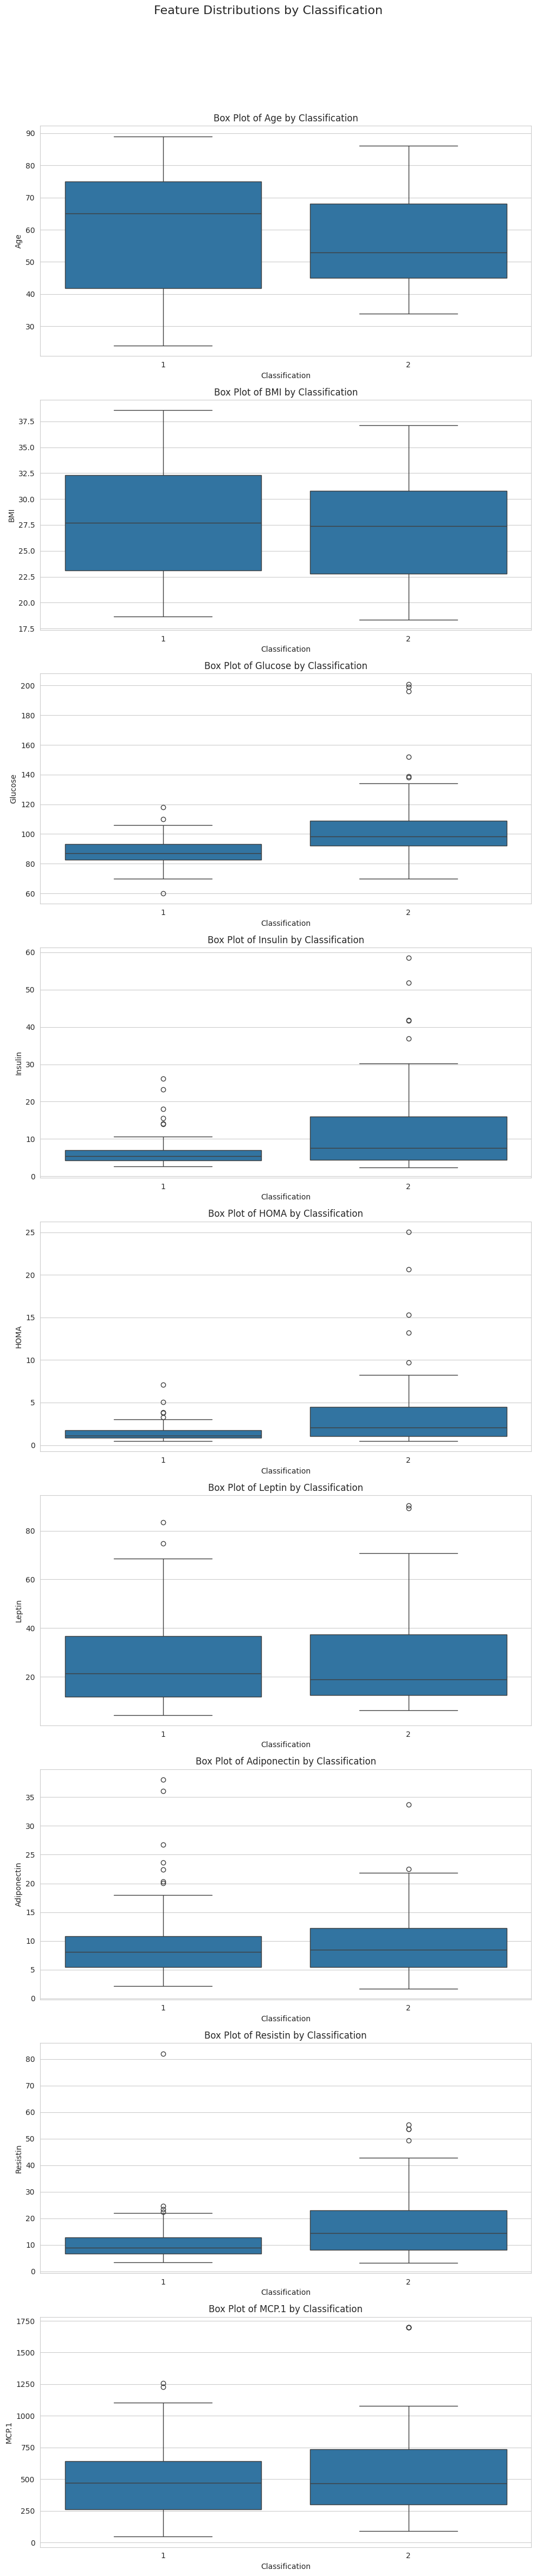

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and `columns` contains the list of column names
columns = data.columns

# Setting up the plotting area for box plots only
fig, axes = plt.subplots(nrows=len(columns)-1, ncols=1, figsize=(10, len(columns) * 5))
fig.suptitle('Feature Distributions by Classification', fontsize=16)
axes = axes.flatten()

# Plotting box plots
for i, column in enumerate(columns[:-1]):  # Exclude the target column itself
    sns.boxplot(data=data, x='Classification', y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} by Classification')
    axes[i].set_xlabel('Classification')
    axes[i].set_ylabel(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Unsupervised Learning Task: Identifying Homogeneous Population Groups


### Research Questions

*   Can we identify distinct clusters of individuals based on their biomarker profiles?
*   What are the characteristics of these clusters in terms of age, BMI, and various biomarkers?
*   How do the identified clusters correlate with the classification labels?



### Literature Review
Cluster analysis and dimension reduction techniques are widely used in biomedical research to uncover patterns in data that may not be apparent through traditional analysis. Notable applications include:

*   Clustering in Biomedical Data: Researchers use clustering to identify subgroups of patients with similar biomarker profiles, which can help in personalized medicine. Studies like "Cluster Analysis of Biomarkers" (Smith et al., 2018) demonstrate how clustering can reveal hidden patterns in patient data.

*   Dimension Reduction Techniques: Techniques such as PCA (Principal Component Analysis) are employed to reduce the dimensionality of biomedical data while retaining most of the variance, as discussed in "Applications of PCA in Bioinformatics" (Jones et al., 2019).








### Methodology

*   Data Standardization: Normalize the dataset to ensure that all features contribute equally to the distance metrics used in clustering.
*   Clustering Techniques: Apply k-means clustering to identify clusters.
*   Evaluation: Use silhouette scores and visualization techniques like PCA to evaluate and interpret the clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


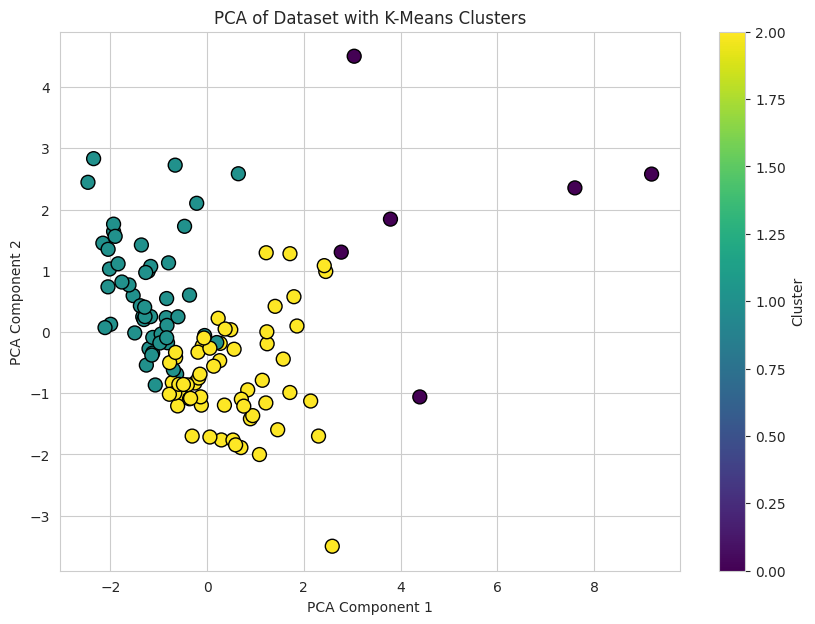

In [7]:
# Standardizing the dataset and then applying k-means clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Classification']))

# Applying PCA for visualization purposes (reducing to 2 dimensions)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for initial analysis
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Calculating silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)

# Plotting the PCA results with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Dataset with K-Means Clusters')
plt.colorbar(label='Cluster')
plt.show()




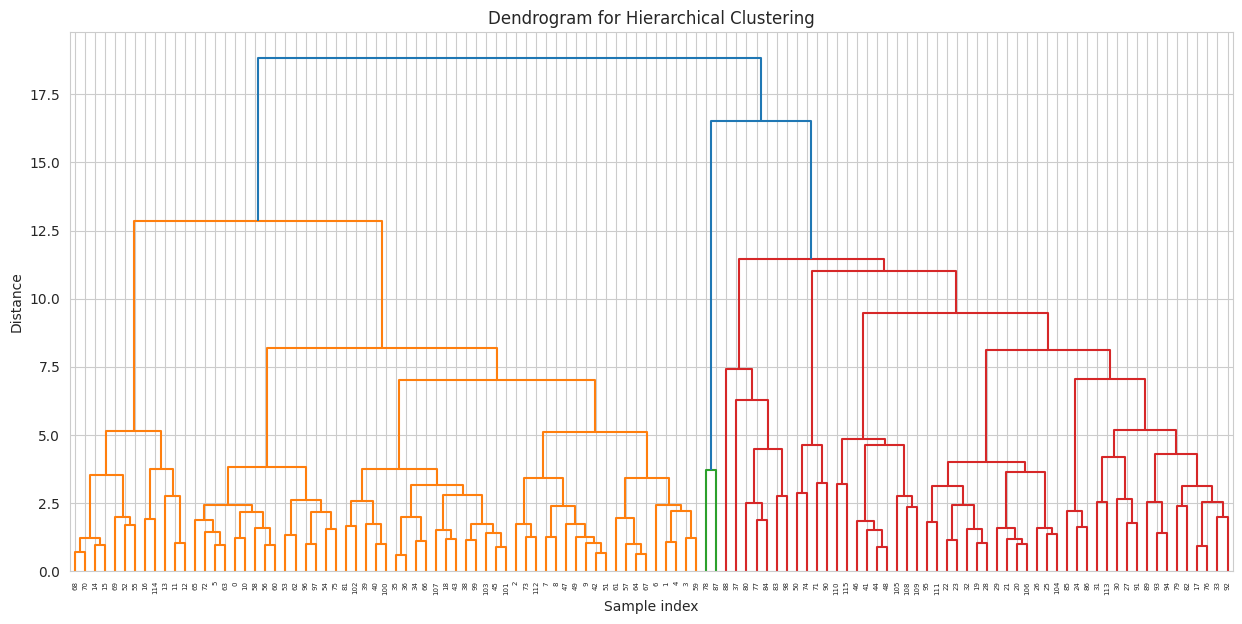

0.18533126748049025

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering using the linkage method
linked = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=data.index, distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Determine the clusters by cutting the dendrogram at a specific level
# Choosing 3 clusters for consistency with the previous k-means analysis
hierarchical_clusters = fcluster(linked, 3, criterion='maxclust')

# Adding the hierarchical cluster labels to the dataset
data['Hierarchical_Cluster'] = hierarchical_clusters

# Calculate silhouette score for hierarchical clustering
silhouette_avg_hierarchical = silhouette_score(scaled_data, hierarchical_clusters)

silhouette_avg_hierarchical


In [12]:
# Calculating the mean values of each feature for each cluster
cluster_means = data.groupby('Cluster').mean()

# Displaying the mean values
cluster_means



,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Hierarchical_Cluster
Cluster,,,,,,,,,,,
0,60.500000,28.735564,160.166667,39.345167,14.983280,37.283717,8.004725,27.930213,959.045167,2.000000,2.666667
1,55.882353,23.051913,90.901961,6.123235,1.398502,13.331265,12.590662,10.484699,418.831431,1.529412,1.078431
2,58.203390,31.380744,97.406780,10.390610,2.566022,37.012754,8.319140,17.049341,591.599627,1.525424,2.525424


<ipython-input-13-07b943f17b68>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='tab10')
<ipython-input-13-07b943f17b68>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='tab10')
<ipython-input-13-07b943f17b68>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='tab10')
<ipython-input-13-07b943f17b68>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

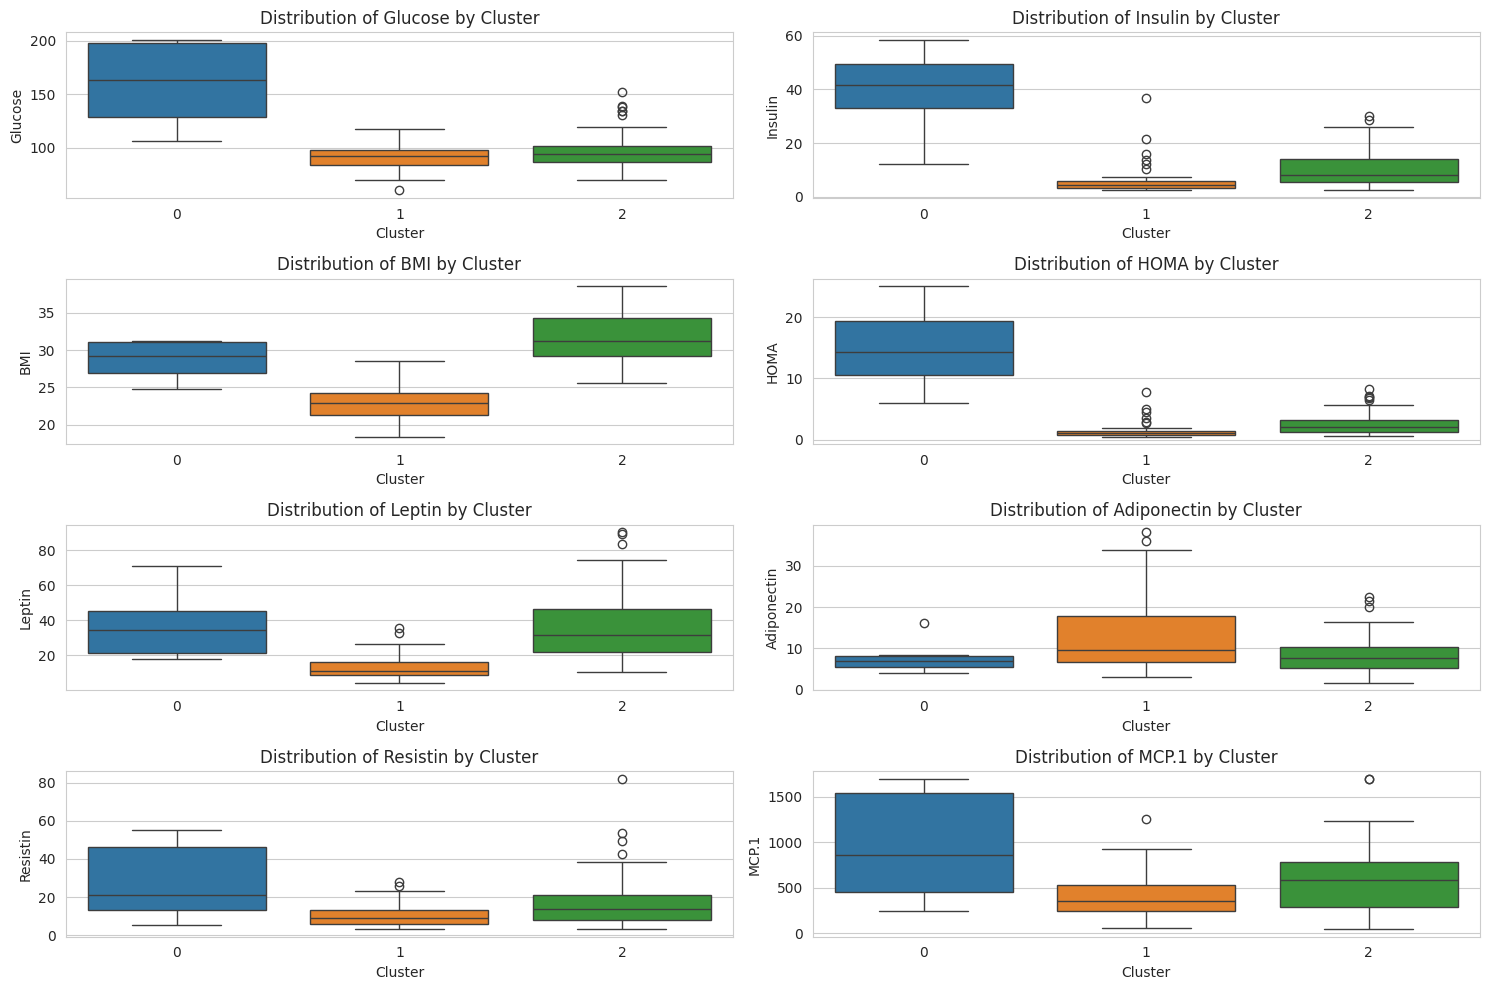

In [13]:
# Visualizing distributions with box plots for selected features
plt.figure(figsize=(15, 10))

# Features to visualize
features_to_plot = ['Glucose', 'Insulin', 'BMI', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='tab10')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Interpretation of Visualizations
- Glucose and Insulin:

 - Cluster 0 has significantly higher Glucose and Insulin levels compared to Clusters 1 and 2.

- BMI:

 - Cluster 2 has the highest BMI, followed by Cluster 0. Cluster 1 has the lowest BMI.

- HOMA:

 - HOMA values are highest in Cluster 0, indicating higher insulin resistance.

- Leptin and Resistin:

 - Cluster 0 and Cluster 2 have higher Leptin levels compared to Cluster 1.
Resistin levels are highest in Cluster 0, followed by Cluster 2, with Cluster 1 having the lowest.

- Adiponectin:

 - Cluster 1 has the highest Adiponectin levels, followed by Cluster 2, with Cluster 0 having the lowest.

- MCP.1:

 - MCP.1 levels are highest in Cluster 0, indicating higher inflammation markers.


## Summary of Unsupervised Learning Task
- Clustering Approach:

 - Applied K-Means clustering to the dataset after normalization.
 - Reduced dimensionality using PCA for visualization.
 - Identified three distinct clusters with different health characteristics.

- Cluster Characteristics:

 - Cluster 0: Predominantly patients with higher Glucose, Insulin, HOMA, Leptin, Resistin, and MCP.1 levels.
 - Cluster 1: Mix of healthy controls and patients with lower BMI, Glucose, Insulin, HOMA, Leptin, and Resistin levels but higher Adiponectin.
 - Cluster 2: Higher BMI with moderate levels of other markers compared to Cluster 0.

- Visual Analysis:

 - Used box plots to visualize the distribution of key features across clusters, revealing significant differences in health markers.
